In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
#Obtaining the first image from the mnist dataset
batch_xs, batch_ys = mnist.train.next_batch(1)

In [17]:
batch_xs.shape, batch_ys.shape

((1, 784), (1, 10))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


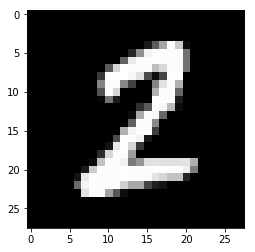

In [18]:
X = batch_xs
X = X.reshape((28, 28))
plt.gray()
plt.imshow(X)
print (batch_ys)

In [23]:
#Computation graph contains computations and different computations are related to each other with edges
#called tensor, thus the name is tensor flow

#Whatever, we are defining in this cell is going to be a part of the computation graph. The graph tells 
#how things are executed

#Placeholder is nothing, but a placeholder. It will be supplied with an actual value during training.
#You can view it as placeholder that accepts a flotating point 784 dimensional value.
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
#tf.nn.softmax applies softmax activation function to Wx + b, as over here we have 10 dimension (classes)
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [24]:
#This is going to be our actual output
y_ = tf.placeholder(tf.float32, [None, 10])

In [25]:
#This is our loss function, over here we have used cross entropy loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [26]:
#This is how we would minimize the loss function.
#This also takes care of backpropogation
#Basically train_step contains the complete computation graph, including the wx+b, softmax calculation, loss, gradient etc..
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [27]:
#session is used, and it feeds the computation graph to CPU or GPU for execution
sess = tf.InteractiveSession()

In [29]:
#Only after running tf.global_variables_initializer() in a session will your variables hold the values 
#you told them to hold when you declare them (tf.Variable(tf.zeros(...))
tf.global_variables_initializer().run()

In [31]:
#In this we run the loop 1000 times, each loop takes random 100 examples from the mnist dataset.
#Then do the training, calculates the loss, perform gradient descent, and updates the weights
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    #train_step is the computation graph feed to sess.run
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [32]:
#tf.argmax returns the index of the max value in the tensor along the specified axis, 
#correct_prediction contains a tensor of boolean
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [39]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [40]:
print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9225
